In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 17.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Inspecting Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Handling data types
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

## EDA

In [ ]:
gender_sales = df.groupby('Gender')['Total'].sum()
print(gender_sales)

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64


In [ ]:
branch_sales = df.groupby('Branch')['Total'].sum()
print(branch_sales)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


In [ ]:
payment_sales = df.groupby('Payment')['Total'].sum()
print(payment_sales)

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


In [ ]:
print(df[['Rating', 'Total']].corr())

          Rating     Total
Rating  1.000000 -0.036442
Total  -0.036442  1.000000


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

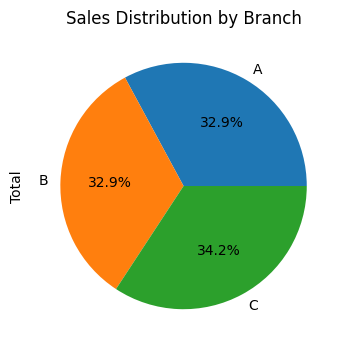

In [ ]:
# Pie Chart: Sales distribution by branch
branch_sales.plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Sales Distribution by Branch')
plt.show()

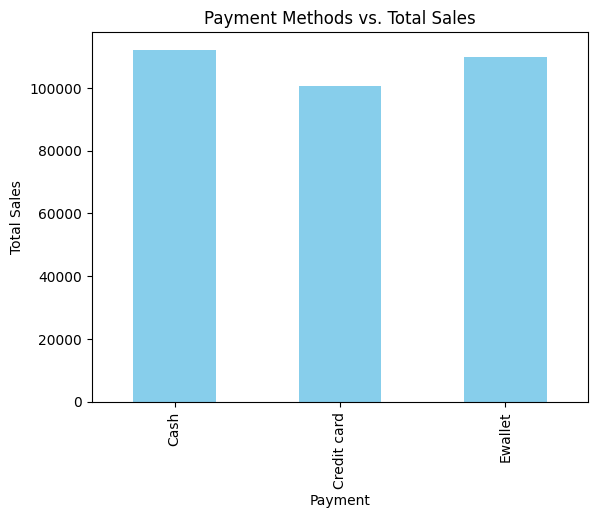

In [ ]:
# Bar Chart: Payment methods vs. total sales
payment_sales.plot.bar(color='skyblue', title='Payment Methods vs. Total Sales')
plt.ylabel('Total Sales')
plt.show()

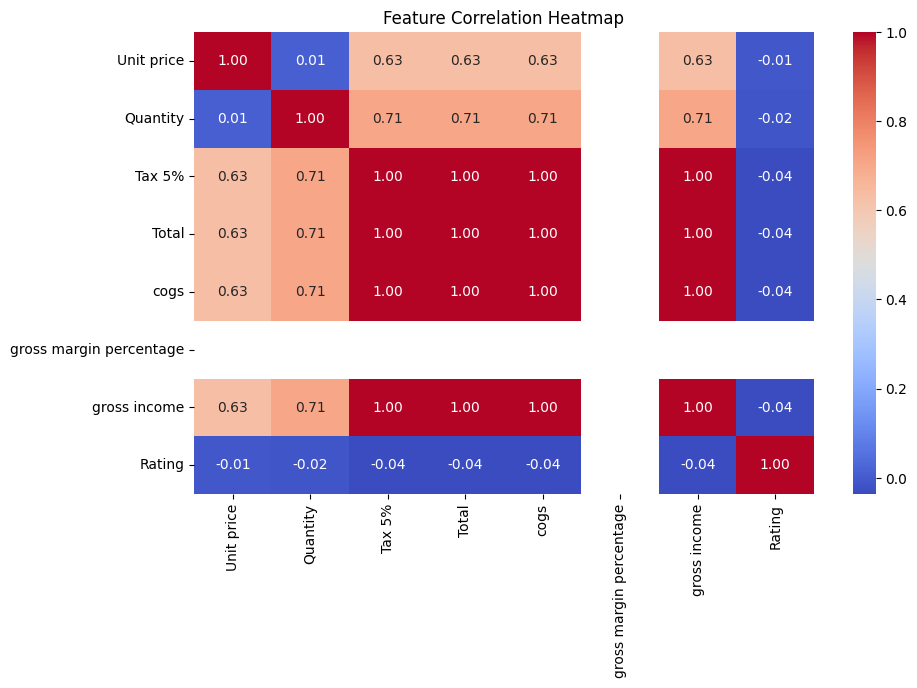

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

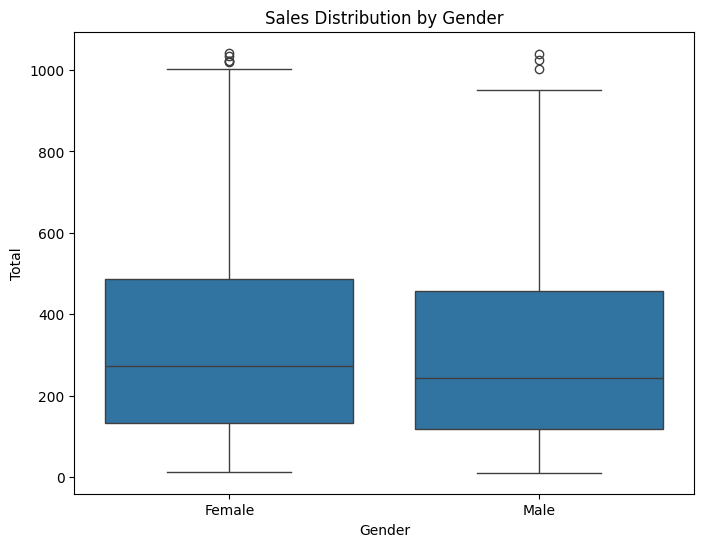

In [ ]:
# Boxplot: Sales distribution by customer gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total', data=df)
plt.title('Sales Distribution by Gender')
plt.show()

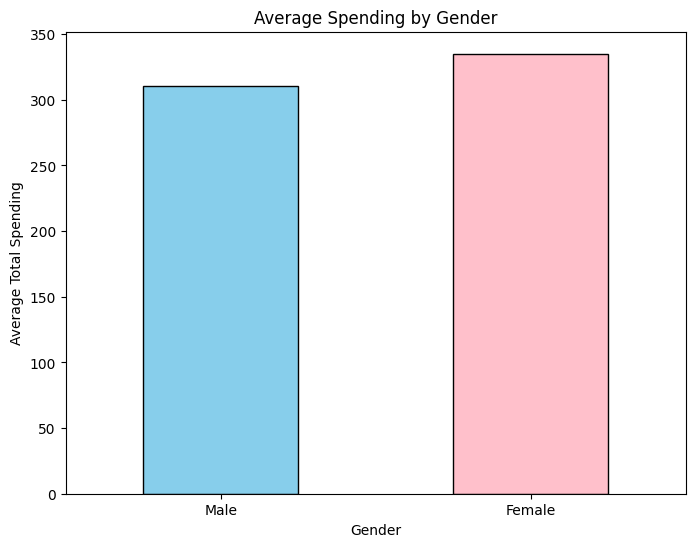

In [ ]:
# Calculate average spending by gender
avg_spending_by_gender = df.groupby('Gender')['Total'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(8, 6))
avg_spending_by_gender.plot(kind='bar', color=['skyblue', 'pink'], edgecolor='black')
plt.title('Average Spending by Gender')
plt.ylabel('Average Total Spending')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

### Summary
##Branch C generates the highest revenue, contributing to 34.2% of total sales.
##Cash is the most preferred payment method.
##On average, female customers spend slightly more than female customers.